Zadanie 4 polegało na nauczeniu sieci perceprotnowej, przy użyciu biblioteki keras, poprawną klasyfikacje tekstur.

In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Najpierw należy załadować dane z .csv, wyodrębnić dane z kazdej kolumny, oraz zamienić nazwy kategorii na liczby całkowite.


In [6]:
df = pd.read_csv('texture_features.csv')

#Wyodrębnij dane i nazwy
X = df.drop('category', axis=1).values
y = df['category'].values

#Zamiana nazw kategori na liczby
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y)

W kolejnym kroku, należy zamienić liczby kategorii na wektory binarne, ponieważ biblioteka keras wymaga etykiet w formacie one-hot

In [ ]:
#One-hot
onehotEncoder = OneHotEncoder(sparse_output=False)
y_onehot = onehotEncoder.fit_transform(y_int.reshape(-1, 1))

W następnym kroku, dane dzielone są na zbiór treningowy oraz testowy, a sam model jest budowany i kompilowany. Model posiada 10 neuronów w wartstwie pośredniej, która wydobywa nieliniowe wzorce. W warstwie wyjściowej są 3 neurony, odpowiadające ilości klas tekstur

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.3, random_state=42
)

#Model
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_dim=72))  # 72 features
model.add(Dense(3, activation='softmax'))  # 3 classes

model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Na samym końcu należy przetestować sieć oraz wyliczyć macierz pomyłek

In [ ]:
#Trenowanie
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=10,
    shuffle=True,
    verbose=1
)


y_pred = model.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)
y_test_int = np.argmax(y_test, axis=1)

#Macierz pomyłek
cm = confusion_matrix(y_test_int, y_pred_int)
print("Confusion Matrix:")
print(cm)

Epoch 1/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5427 - loss: 0.9409
Epoch 2/100
 77/484 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6670 - loss: 0.8124

Dokładnośc modelu dla 1 zdjęcia w każdej kategorii - tylko jeden błąd po 100 epokach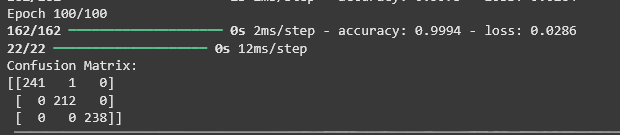

Gdy znajdują się po 3 zdjęcia w kategorii, z powodu lekkich różnic w oświetleniu/teksturze, dokładnośc jest mniejsza. Również ilośc błędów jest o wiele większa.

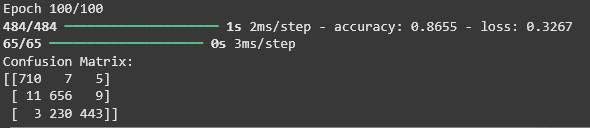
